In [1]:
from numpy import array
import inspect
import subprocess
import shlex
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_breast_cancer as bc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from numpy import array
import scipy.cluster.vq as vq1
from scipy.cluster.vq import vq, kmeans, whiten, kmedians
#from vq import vq, kmeans, whiten, kmedians  ## issues with this
import matplotlib.pyplot as plt
import os
import time
print(os.path.abspath(scipy.cluster.vq.__file__))
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

/home/michael/anaconda3/lib/python3.6/site-packages/scipy/cluster/vq.py


In [2]:
import matplotlib.gridspec as gridspec
def make_ticklabels_invisible(fig):
    for i, ax in enumerate(fig.axes):
        #ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        if i in [0,1,2,6,7,8]:
            ax.tick_params(labelbottom=False, labelleft=False,bottom=False,left=False)



f = plt.figure(figsize = (17*1.5,13*1.5))
n=5
gs = gridspec.GridSpec(4, 3,
                       width_ratios=[1, 1,1], height_ratios=[n, 1,n,1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax6 = plt.subplot(gs[5])
ax7 = plt.subplot(gs[6])
ax8 = plt.subplot(gs[7])
ax9 = plt.subplot(gs[8])
ax10 = plt.subplot(gs[9])
ax11 = plt.subplot(gs[10])
ax12 = plt.subplot(gs[11])

make_ticklabels_invisible(f)
plt.tight_layout(w_pad=3,h_pad = 1)
mpl.rcParams['font.size'] = 40


# Breast Cancer

In [3]:
X, Y = bc(return_X_y=True)
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_tr)
X_2d = pca.transform(X_tr)

kernel = gaussian_kde(X_2d.T)

In [4]:
xmin, xmax = min(X_2d[:,0]), max(X_2d[:,0])
ymin, ymax = min(X_2d[:,1]), max(X_2d[:,1])
xx, yy = np.mgrid[xmin:xmax:1000j, ymin:ymax:1000j]
pos = np.vstack([xx.ravel(), yy.ravel()])
p_x = np.reshape(kernel(pos), xx.shape)

In [5]:
def find_density(p_x,dimx,dimy,pixel_gap):
    '''finds spatial density in grid'''

    ave_density = np.average(p_x)
    return ave_density

def generate_array(H,dimx,dimy,pixel_gap,ave_density):
    data = np.ones([dimx,dimy])
    data *= ave_density
    for i,x in enumerate(p_x):
        for j,y in enumerate(x):
            data[i+pixel_gap,j+pixel_gap] = y
    return data

In [6]:
n=2000
dimx,dimy = n,n ##### maybe take this from command line
pixel_gap = n/2
#ave_density = find_density(p_x,dimx,dimy,pixel_gap)
#print(ave_density)

In [7]:
n=2000
dat3 = np.loadtxt('cart-1.2.2/xy'+str(n)+str(n)+'bc.dat')
newdist = np.loadtxt('cart-1.2.2/'+str(n)+str(n)+'bc.dat')

PATH = 'cart-1.2.2/'
PATH1 = 'cart-1.2.2/'
file = open(PATH+"bc_cart.sh","w") 
file.write("#!/bin/sh\n") 
types = ['bc']
k=0
i=0
file.write("./cart "+str(n)+" "+ str(n)+" "+str(n)+str(n)+"bc.dat bcout.dat")
file.close() 
p1=subprocess.call(['chmod','a+x',PATH+"interp"+types[k]+str(i)+".sh"])


p=subprocess.Popen(['./bc_cart.sh'], cwd =PATH) # makes expout.dat
p.wait()



127

In [8]:
N=1

data_list = [dat3]
titles = ["C","F"]
types = ['bc']

dat = np.zeros([1,2])

k=0
j=0


kernel = gaussian_kde(dat3.T)
xmin, xmax = 0, 2000
ymin, ymax = 0, 2000
xx, yy = np.mgrid[xmin:xmax:2000j, ymin:ymax:2000j]
pos = np.vstack([xx.ravel(), yy.ravel()])
p_x = np.reshape(kernel(pos), xx.shape)
_max = np.amax(p_x)
mp=ax3.imshow(np.flipud(np.rot90(p_x)),origin='lower',cmap=plt.cm.jet_r,vmax=_max )

features = data_list[k]
codebook, distortion = kmedians(features,N)
code, dist= vq(features,codebook)

for i in range(N):

    # MAKE SHELL SCRIPT 
    file = open(PATH+"interp"+types[k]+str(i)+".sh","w") 
    file.write("#!/bin/sh\n") 
    file.write("cat "+PATH+types[k]+str(i)+".dat | ./interp "+str(n)+" "+ str(n)+" " \
               +types[k]+"out.dat > "+PATH+types[k]+"out"+str(i)+".dat\n")
    file.write("cat "+PATH+"dif"+types[k]+str(i)+".dat | ./interp "+str(n)+" "+ str(n)+" "\
               +types[k]+"out.dat > "+PATH+"dif"+types[k]+"out"+str(i)+".dat\n")
    file.close() 
 

    # MAKE EXECUTABLE
    p=subprocess.call(['chmod','a+x',PATH+"interp"+types[k]+str(i)+".sh"])
    # save data to go to interp
    x = features[code==i,0]
    y = features[code==i,1]


    np.savetxt(PATH+types[k]+str(i)+'.dat',np.column_stack([x,y]),fmt ='%.18f',delimiter=' ')
    np.savetxt(PATH+"dif"+types[k]+str(i)+'.dat',np.column_stack([codebook[:,0],codebook[:,1]]),fmt ='%.18f',delimiter=' ')
    # plot
    ax3.scatter(x, y,s=8, c=Y, cmap=plt.cm.bone, alpha=0.3)
    #axs[j].plot(x,y,'.',alpha=0.4, c=colors[i%len(colors)])

    # call interp
    #print(PATH+"interp"+types[k]+str(i)+".sh")
    p = subprocess.Popen(['./'+"interp"+types[k]+str(i)+".sh"], cwd =PATH) # makes expout.dat

    p.wait()

    # saves data to run through interp shell script
    data=np.loadtxt(PATH+types[k]+'out'+str(i)+'.dat') #Gaussout0.dat
    
   
    #axs[j+1].plot(data[:,0],data[:,1],'.',alpha=0.4, c=colors[i%len(colors)])
    ax9.scatter(data[:,0], data[:,1],s=8, c=Y, cmap=plt.cm.bone, alpha=0.3)
    
    
    if types[k]=="bc":
        dat = np.append(dat,data,axis=0)
    elif types[k]=="gauss":
        dat4 = np.append(dat4,data,axis=0)
        
kernel = gaussian_kde(dat.T)
xmin1, xmax1 = 0, 2000
ymin1, ymax1 = 0, 2000
xx1, yy1 = np.mgrid[xmin1:xmax1:np.complex(0,n), ymin1:ymax1:np.complex(0,n)]
pos1 = np.vstack([xx1.ravel(), yy1.ravel()])
p_x_dif = np.reshape(kernel(pos1), xx1.shape)
mp1=ax9.imshow(np.flipud(np.rot90(p_x_dif)),cmap=plt.cm.jet_r,vmax=_max)

new_ax=plt.axes([1, 0.0, .02, 1])
cbar = plt.colorbar(mp1,cax=new_ax,format='%.1e',orientation='vertical')


 


In [9]:
ax3.text(.92,.92,titles[0],fontsize=50,transform = ax3.transAxes,color='white')
ax3.set_xlim(500,1500)
ax3.set_ylim(500,1500)
ax9.text(.92,.92,titles[1],fontsize=50,transform = ax9.transAxes,color='white')
ax9.set_xlim(500,1500)
ax9.set_ylim(500,1500)

ax3.set_ylabel("V1")
ax3.set_xlabel("V2")
ax9.set_ylabel("V1")
ax9.set_xlabel("V2")




Text(0.5,294.401,'V2')

In [10]:
def kde_sklearn(x, x_grid, bandwidth=None, kernel='tophat', **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    if bandwidth is None:
        bandwidth = 1.06 * np.std(x) * (len(x) ** -0.2)
        
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

#plt.semilogy(kde_x,kde_sklearn(d_tears, kde_x,bandwidth=0.1),'.')
#plt.show()

In [11]:
bin_min = 500
bin_max = 1500

#axs[1].plot([bin_min, bin_min,bin_max,bin_max,bin_min], [bin_min,bin_max,bin_max,bin_min,bin_min], 'k-',lw=.5) 
#axs[3].plot([bin_min, bin_min,bin_max,bin_max,bin_min], [bin_min,bin_max,bin_max,bin_min,bin_min], 'k-',lw=.5) 
    
    
    
    
## Histograms
binsize = 30
bigbin = 20

## exp raw
Hexdat,xedge,yedge=np.histogram2d(dat3[:,0],dat3[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]]) 
H,xedge,yedge=np.histogram2d(dat[:,0],dat[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]]) #BINS = SIZE/2*PIXELGAP

d_tears = Hexdat.flatten()
kde_x = np.linspace(np.min(d_tears),np.max(d_tears),len(d_tears))





ax6.hist(Hexdat.flatten(),bins = 15,histtype = "bar",density=True)
xmin, xmax = ax6.get_xlim()
ax6.set_yscale('log', nonposy='clip')
ax6.set_ylabel(r'$P(V)$')

ax12.hist(H.flatten(),bins = 8,histtype = "bar",density=True)
ax12.set_yscale('log', nonposy='clip')
ax12.set_xlim([xmin,xmax])
ax12.set_ylabel(r'$P(V)$')
plt.draw()

# HOOOOOOOTTTTT


In [12]:
PATH = 'cart-1.2.2/'
N = 50000           #default number of points to draw from distribution
dist_type = "HOT_gaussian"

dimx = 512
dimy = 512
pixel_gap = 150
plot = "'True'"


# MAKE SHELL SCRIPT 
file = open("dist_gen.sh","w") 
file.write("#!/bin/sh\n") 
file.write("python new_dist_gen.py -N "+str(N) +" -d "+str('hot')+" -x "+str(dimx)+ \
    " -y "+str(dimy)+" -p "+str(pixel_gap) + " -P "+str(plot)+"\n")
# for different sizes and distributions, check help doc on new_dist_gen.py
# file.write("python new_dist_gen.py\n")

file.close() 

# MAKE EXECUTABLE
p=subprocess.call(['chmod','a+x',"dist_gen.sh"])


p = subprocess.Popen(['./'+"dist_gen.sh"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) 
p.wait()


# data import
newdist = np.loadtxt('cart-1.2.2/'+str(dimx)+str(dimy)+str(dist_type)+'.dat')
data=np.loadtxt(PATH+'xy512512hot1.dat')
dat2 = np.loadtxt('cart-1.2.2/xy'+str(dimx)+str(dimy)+str(dist_type)+'.dat')

In [13]:
def interpolate(x1,x2):
    '''does its best to interpolate between any two points'''
    xvals = np.linspace(np.min([x1[0],x2[0]]), np.max([x1[0],x2[0]]), 20)
    if x1[0] < x2[0]:
        yinterp = np.interp(xvals, [x1[0],x2[0]], [x1[1],x2[1]])
    elif x1[0]>x2[0]:
        yinterp = np.interp(xvals, [x2[0],x1[0]], [x2[1],x1[1]])
    else:
        yinterp = np.linspace(x1[1],x2[1],20)
    return np.column_stack((xvals,yinterp))

distance = np.zeros([len(data),len(data)])
for i,x in enumerate(data):
    for j,y in enumerate(data):
        
        distance[i,j]=np.sqrt(np.sum(x-y)**2)
distance_map = np.sort(list(set(distance.flatten())))[1:4]
print(distance_map)


augmented_data = [[0,0]]
for i,x in enumerate(data):
    for j,y in enumerate(data):
        if  np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)<distance_map[-2]:
            augmented_data = np.append(augmented_data,interpolate(x,y),axis=0)
            
augmented_data = np.delete(augmented_data,0,0)
np.savetxt('cart-1.2.2/xy512512hot2.dat',augmented_data,fmt='%.8f')


[ 3.3125  6.625   9.9375]


In [14]:




file = open(PATH+"exp_cart.sh","w") 
file.write("#!/bin/sh\n") 
file.write("./cart "+str(dimx) +" "+str(dimy)+" "+str(dimx)+str(dimy)+str(dist_type)+'.dat '+str(dist_type)+"out.dat"+"\n")
file.close() 

# MAKE EXECUTABLE
p=subprocess.call(['chmod','a+x',PATH+"exp_cart.sh"])


p=subprocess.Popen(['./exp_cart.sh'], cwd =PATH) # makes expout.dat
p.wait()
#p=subprocess.Popen(['./gauss_cart.sh'], cwd =PATH)
#p.wait()

N=1                                      # number of clusters

axs = [ax2,ax8]
data_list = [dat2]
titles = ["B","E"]
types = ['HOT_gaussian']

dat = np.zeros([1,2])
dat4 = np.zeros([1,2])

for k,j in enumerate([0]):
    
    features = data_list[k]
    codebook, distortion = kmedians(features,N)
    code, dist= vq(features,codebook)
    
    for i in range(N):
        
        # MAKE SHELL SCRIPT 
        file = open(PATH+"interp"+types[k]+str(i)+".sh","w") 
        file.write("#!/bin/sh\n") 
        file.write("cat "+types[k]+str(i)+".dat | ./interp "+str(dimx)+" "+str(dimy)+" "\
                   +types[k]+"out.dat > "+types[k]+"out"+str(i)+".dat\n")
        file.write("cat "+"dif"+types[k]+str(i)+".dat | ./interp "+str(dimx)+" "+str(dimy)+" "\
                   +types[k]+"out.dat > "+"dif"+types[k]+"out"+str(i)+".dat\n")
        file.close()  
                    
        # MAKE EXECUTABLE
        p=subprocess.call(['chmod','a+x',PATH+"interp"+types[k]+str(i)+".sh"])
        # save data to go to interp
        x = features[code==i,0]
        y = features[code==i,1]
        
        
        np.savetxt(PATH+types[k]+str(i)+'.dat',np.column_stack([x,y]),fmt ='%.18f',delimiter=' ')
        np.savetxt(PATH+"dif"+types[k]+str(i)+'.dat',np.column_stack([codebook[:,0],codebook[:,1]]),fmt ='%.18f',delimiter=' ')
        
        # plot
        axs[j].plot(x,y,',', c=colors[i%len(colors)])
        
        # call interp
        p = subprocess.Popen(['./'+"interp"+types[k]+str(i)+".sh"], cwd =PATH) # makes expout.dat
        p.wait()        
        
        # loads data to run through interp shell script
        data=np.loadtxt(PATH+types[k]+'out'+str(i)+'.dat') #Gaussout0.dat
        
        

        axs[j+1].plot(data[:,0],data[:,1],',', c=colors[i%len(colors)])
        dat = np.append(dat,data,axis=0)
        if types[k]=="exp":
            dat = np.append(dat,data,axis=0)
        elif types[k]=="gauss":
            dat4 = np.append(dat4,data,axis=0)
        
        # delete used shell script
        p = subprocess.call(['rm',PATH+"interp"+types[k]+str(i)+".sh"])
        
        p = subprocess.call(['rm',PATH+types[k]+"out"+str(i)+".dat"])
        p = subprocess.call(['rm',PATH+types[k]+str(i)+".dat"])
        
        
                             
        axs[j].plot(codebook[:,0],codebook[:,1],'ko',ms=3)
    
        dif_medians = np.loadtxt(PATH+'dif'+types[k]+'out'+str(i)+'.dat')
        if N>1:
            axs[j+1].plot(dif_medians[:,0],dif_medians[:,1],'ko',ms=3)
        else:
            axs[j+1].plot(dif_medians[0],dif_medians[1],'ko',ms=3)
        
for j in range(2):    
    axs[j].text(.92,.92,titles[j],fontsize=50,transform = axs[j].transAxes)
    axs[j].set_ylabel("Y")
    axs[j].set_xlabel("X")

#plt.setp([a.get_xticklabels() for a in f.axes], visible=False)



file = open(PATH+"interp"+types[k]+str(i)+".sh","w") 
file.write("#!/bin/sh\n") 
file.write("cat xy512512hot2.dat | ./interp "+str(dimx)+" "+str(dimy)+" "\
           +types[k]+"out.dat > "+types[k]+"out"+str(i)+".dat\n")
file.close()  

# MAKE EXECUTABLE
p=subprocess.call(['chmod','a+x',PATH+"interp"+types[k]+str(i)+".sh"])


p = subprocess.Popen(['./'+"interp"+types[k]+str(i)+".sh"], cwd =PATH) # makes expout.dat
p.wait()    

data=np.loadtxt(PATH+types[k]+'out'+str(i)+'.dat')

axs[1].plot(data[:,0],data[:,1],'k.')

data1=np.loadtxt(PATH+'xy512512hot2.dat')
axs[0].plot(data1[:,0],data1[:,1],'k.')






In [15]:
bin_min = 190
bin_max = 265


    
## Histograms
binsize = 30
bigbin = 20

## exp raw
Hexdat,xedge,yedge=np.histogram2d(dat2[:,0],dat2[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]]) 

H,xedge,yedge=np.histogram2d(dat[:,0],dat[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]]) #BINS = SIZE/2*PIXELGAP




ax5.hist(Hexdat.flatten(),bins = 15,histtype = "bar",density=True)
xmin, xmax = ax5.get_xlim()
ax5.set_yscale('log', nonposy='clip')
ax5.set_ylabel(r'$P(V)$')

ax11.hist(H.flatten(),bins = 15,histtype = "bar",density=True)
ax11.set_yscale('log', nonposy='clip')
ax11.set_xlim([xmin,xmax])
ax11.set_ylabel(r'$P(V)$')
plt.draw()

# exp

In [16]:
PATH = 'cart-1.2.2/'
N = 50000           #default number of points to draw from distribution
dist_type = "exp"

dimx = 512
dimy = 512
pixel_gap = 150
plot = "'True'"


# MAKE SHELL SCRIPT 
file = open("dist_gen.sh","w") 
file.write("#!/bin/sh\n") 
file.write("python new_dist_gen.py -N "+str(N) +" -d "+str(dist_type)+" -x "+str(dimx)+ \
    " -y "+str(dimy)+" -p "+str(pixel_gap) + " -P "+str(plot)+"\n")
# for different sizes and distributions, check help doc on new_dist_gen.py
# file.write("python new_dist_gen.py\n")

file.close() 

# MAKE EXECUTABLE
p=subprocess.call(['chmod','a+x',"dist_gen.sh"])


p = subprocess.Popen(['./'+"dist_gen.sh"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) 
p.wait()

0

In [17]:
newdist = np.loadtxt('cart-1.2.2/'+str(dimx)+str(dimy)+str(dist_type)+'.dat')
dat2 = np.loadtxt('cart-1.2.2/xy'+str(dimx)+str(dimy)+str(dist_type)+'.dat')

In [18]:

file = open(PATH+"exp_cart.sh","w") 
file.write("#!/bin/sh\n") 
file.write("./cart "+str(dimx) +" "+str(dimy)+" "+str(dimx)+str(dimy)+str(dist_type)+'.dat '+str(dist_type)+"out.dat"+"\n")
file.close() 

# MAKE EXECUTABLE
p=subprocess.call(['chmod','a+x',PATH+"exp_cart.sh"])


p=subprocess.Popen(['./exp_cart.sh'], cwd =PATH) # makes expout.dat
p.wait()
#p=subprocess.Popen(['./gauss_cart.sh'], cwd =PATH)
#p.wait()

N=100                                       # number of clusters

axs = [ax1,ax7]
data_list = [dat2]
titles = ["A","D"]
types = ['exp']

dat = np.zeros([1,2])
dat4 = np.zeros([1,2])

for k,j in enumerate([0]):
    
    features = data_list[k]
    codebook, distortion = kmedians(features,N)
    code, dist= vq(features,codebook)
    
    for i in range(N):
        
        # MAKE SHELL SCRIPT 
        file = open(PATH+"interp"+types[k]+str(i)+".sh","w") 
        file.write("#!/bin/sh\n") 
        file.write("cat "+types[k]+str(i)+".dat | ./interp "+str(dimx)+" "+str(dimy)+" "\
                   +types[k]+"out.dat > "+types[k]+"out"+str(i)+".dat\n")
        file.write("cat "+"dif"+types[k]+str(i)+".dat | ./interp "+str(dimx)+" "+str(dimy)+" "\
                   +types[k]+"out.dat > "+"dif"+types[k]+"out"+str(i)+".dat\n")
        file.close()  
                    
        # MAKE EXECUTABLE
        p=subprocess.call(['chmod','a+x',PATH+"interp"+types[k]+str(i)+".sh"])
        # save data to go to interp
        x = features[code==i,0]
        y = features[code==i,1]
        
        
        np.savetxt(PATH+types[k]+str(i)+'.dat',np.column_stack([x,y]),fmt ='%.18f',delimiter=' ')
        np.savetxt(PATH+"dif"+types[k]+str(i)+'.dat',np.column_stack([codebook[:,0],codebook[:,1]]),fmt ='%.18f',delimiter=' ')
        
        # plot
        axs[j].plot(x,y,',', c=colors[i%len(colors)])
        
        # call interp
        p = subprocess.Popen(['./'+"interp"+types[k]+str(i)+".sh"], cwd =PATH) # makes expout.dat
        p.wait()        
        
        # loads data to run through interp shell script
        data=np.loadtxt(PATH+types[k]+'out'+str(i)+'.dat') #Gaussout0.dat
        
        

        axs[j+1].plot(data[:,0],data[:,1],',', c=colors[i%len(colors)])
        if types[k]=="exp":
            dat = np.append(dat,data,axis=0)
        elif types[k]=="gauss":
            dat4 = np.append(dat4,data,axis=0)
        
        # delete used shell script
        p = subprocess.call(['rm',PATH+"interp"+types[k]+str(i)+".sh"])
        
        p = subprocess.call(['rm',PATH+types[k]+"out"+str(i)+".dat"])
        p = subprocess.call(['rm',PATH+types[k]+str(i)+".dat"])
                      
    axs[j].plot(codebook[:,0],codebook[:,1],'ko',ms=3)
    
    dif_medians = np.loadtxt(PATH+'dif'+types[k]+'out'+str(i)+'.dat')
    axs[j+1].plot(dif_medians[:,0],dif_medians[:,1],'ko',ms=4)
        
for j in range(2):    
    axs[j].text(.92,.92,titles[j],fontsize=50,transform = axs[j].transAxes)
    axs[j].set_ylabel("Y")
    axs[j].set_xlabel("X")
plt.draw()

In [19]:
bin_min = 150
bin_max = 265


    
## Histograms
binsize = 30
bigbin = 20

## exp raw
Hexdat,xedge,yedge=np.histogram2d(dat2[:,0],dat2[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]])
H,xedge,yedge=np.histogram2d(dat[:,0],dat[:,1],bins=[binsize,binsize],range=[[bin_min, bin_max], [bin_min, bin_max]]) #BINS = SIZE/2*PIXELGAP



ax4.hist(Hexdat.flatten(),bins = 15,histtype = "bar",density=True)
xmin, xmax = ax4.get_xlim()
ax4.set_yscale('log', nonposy='clip')
ax4.set_ylabel(r'$P(V)$')

ax10.hist(H.flatten(),bins = 15,histtype = "bar",density=True)
ax10.set_yscale('log', nonposy='clip')
ax10.set_xlim([xmin,xmax])
ax10.set_ylabel(r'$P(V)$')


plt.draw()


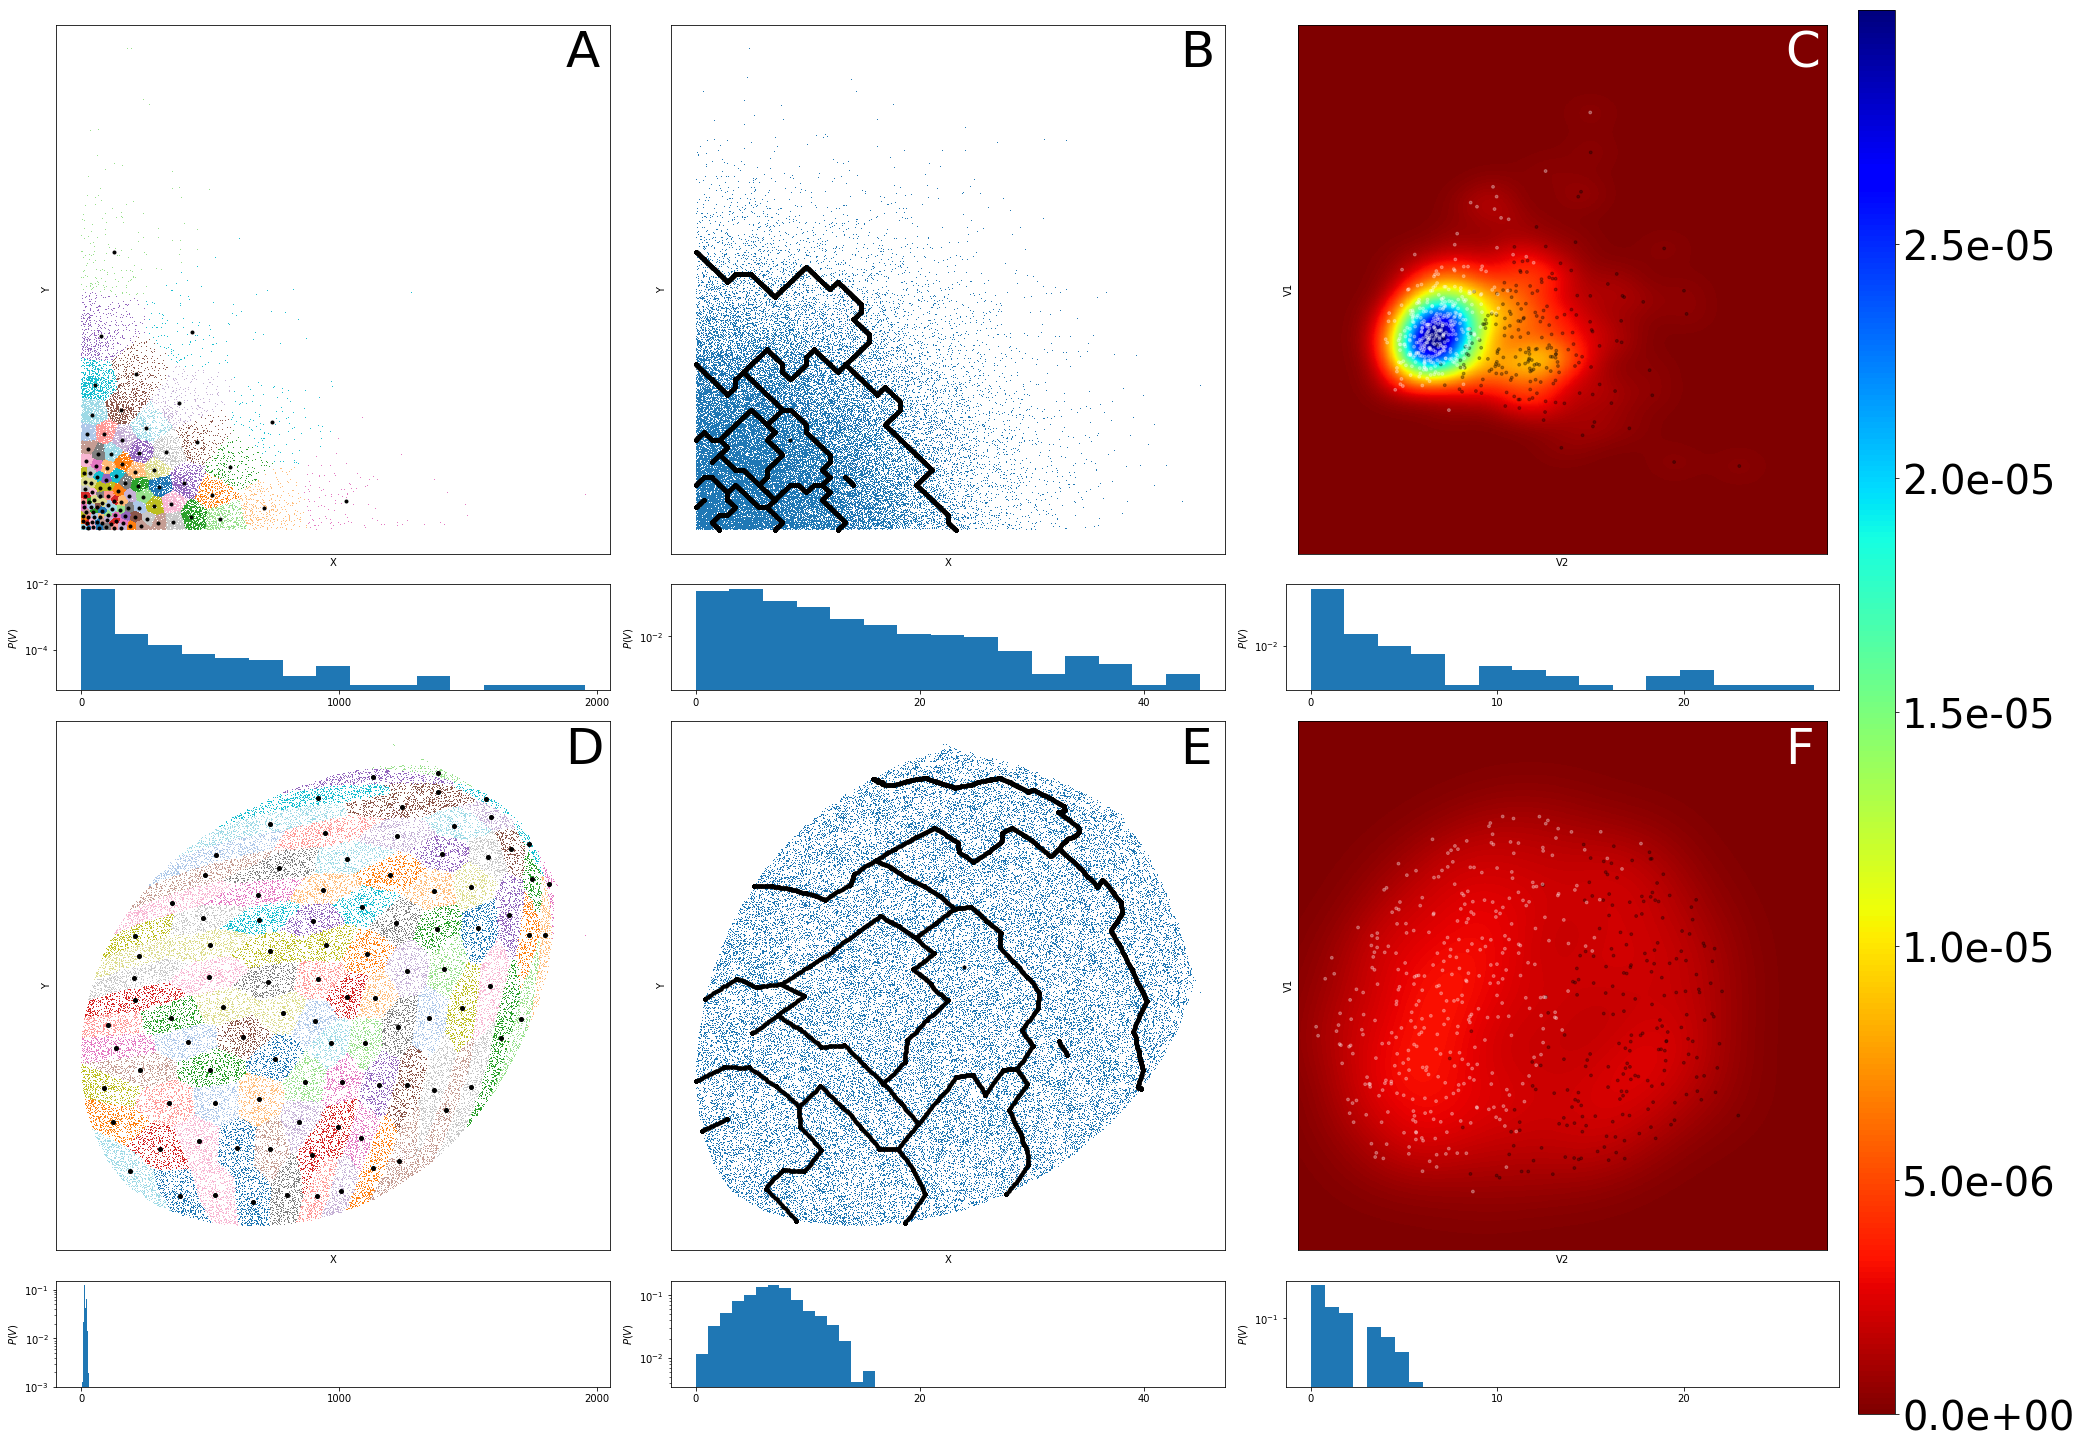

In [20]:
plt.show()

In [21]:
def kde_sklearn(x, x_grid, bandwidth=None, kernel='tophat', **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    if bandwidth is None:
        bandwidth = 1.06 * np.std(x) * (len(x) ** -0.2)
        
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

#plt.semilogy(kde_x,kde_sklearn(d_tears, kde_x,bandwidth=0.1),'.')
#plt.show()
g = sns.jointplot(x=dat[:,0], y=dat[:,1], kind='kde',xlim=[500,1500],ylim=[500,1500],vmax=_max,stat_func=None)
g = g.plot_joint(plt.scatter,marker='.',c=Y, cmap=plt.cm.bone, alpha=0.4)
plt.show()

NameError: name 'sns' is not defined